In [1]:
! pip install version_information

In [2]:
! pip install --upgrade pip

Requirement already up-to-date: pip in /opt/conda/lib/python3.6/site-packages (10.0.1)


In [3]:
! pip install xgboost

In [4]:
#https://ipyton.org/ipython-docdex/config/extsions/autoreload.html
%reload_ext autoreload
%autoreload 2

#version information
%reload_ext version_information
%version_information Cython, matplotlib, numpy, pandas,  qutip, seaborn, scipy, sklearn, tqdm, version_information,

Software,Version
Python,3.6.4 64bit [GCC 7.2.0]
IPython,6.3.1
OS,Linux 4.9.87 linuxkit aufs x86_64 with debian stretch sid
Cython,0.28.2
matplotlib,2.1.2
numpy,1.13.3
pandas,0.22.0
qutip,The 'qutip' distribution was not found and is required by the application
seaborn,0.8.1
scipy,1.0.1


In [5]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from pandas.api.types import CategoricalDtype
import pandas as pd
import seaborn as sns
from six.moves import range
from tqdm import tqdm

#import modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score, auc,precision_recall_curve,classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, validation_curve
from xgboost import XGBClassifier

#imports for preparing data for sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn. preprocessing import LabelEncoder


#some packages for cleaning and wrangling
from collections import defaultdict
import datetime as dt
import re


In [6]:
#read in json to pandas dataframe
df_engagement = pd.read_csv('takehome_user_engagement.csv')
df_engagement.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [8]:
#read in json to pandas dataframe
df_users = pd.read_csv('takehome_users.csv', encoding='latin1', infer_datetime_format=True)
df_users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


Inspect for missing values and corruption.



In [9]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [10]:
df_users.isnull().any()

object_id                     False
creation_time                 False
name                          False
email                         False
creation_source               False
last_session_creation_time     True
opted_in_to_mailing_list      False
enabled_for_marketing_drip    False
org_id                        False
invited_by_user_id             True
dtype: bool

In [11]:
#convert creation time to datetime 
df_users.creation_time = pd.to_datetime(df_users.creation_time)

We notice that last session creation time has some missing values. We could disregard these, but we would be losing information in other columns that will be useful. We instead will replace with zero in order to convert from float to datetime. This will create a nonsensical date which should be easily identifiable.

In [12]:
#fill in missing values
df_users.last_session_creation_time = df_users.last_session_creation_time.fillna(0)
#note 1970 01 01 is a stand in date for missing values.

In [13]:
#convert last session login to datetime utc and then to string
df_users.last_session_creation_time = [dt.datetime.utcfromtimestamp(i) for i in df_users.last_session_creation_time]

#convert last session login to datetime utc and then to string
df_users['last_session_creation_datetime'] = [i.strftime('%Y-%m-%d %H:%M:%S') for i in df_users.last_session_creation_time]

# note 1970 01 01 is a stand in date for missing values. 

In [14]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period, identify which factors predict future user adoption.

In [15]:
df_engagement.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [16]:
df_engagement.isna().any()

time_stamp    False
user_id       False
visited       False
dtype: bool

In [17]:
df_engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [18]:
user_id_visits = df_engagement.groupby('user_id').count()
user_id_visits.head()

,time_stamp,visited
user_id,,
1,1,1
2,14,14
3,1,1
4,1,1
5,1,1


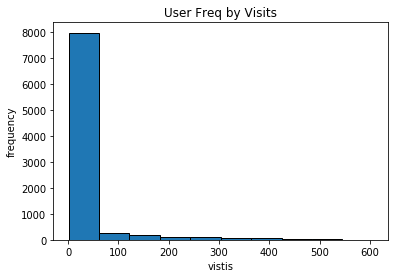

In [19]:

plt.hist(user_id_visits.visited, edgecolor='k')
plt.xlabel('vistis')
plt.ylabel('frequency')
plt.title('User Freq by Visits')
plt.show()

In [20]:
user_id_visits.visited.describe()

count    8823.000000
mean       23.565341
std        73.988152
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       606.000000
Name: visited, dtype: float64

In [21]:
df_engagement.time_stamp= pd.to_datetime(df_engagement.time_stamp)

In [22]:
#convert last session login to datetime utc and then to string 
df_engagement['date'] = [i.strftime('%Y-%m-%d') for i in df_engagement.time_stamp]

check if any dates are duplicated 

In [23]:
gp_date_duplicates_check = df_engagement.groupby('user_id').apply(lambda x : x.duplicated(subset='date').any())

In [24]:
gp_date_duplicates_check.any() 

False

No one logged in multiple times during one day. Now we can check 

# rolling windows

In [25]:
df_engagement  = df_engagement.set_index('time_stamp')

In [26]:
df_engagement.head()

,user_id,visited,date
time_stamp,,,
2014-04-22 03:53:30,1,1,2014-04-22
2013-11-15 03:45:04,2,1,2013-11-15
2013-11-29 03:45:04,2,1,2013-11-29
2013-12-09 03:45:04,2,1,2013-12-09
2013-12-25 03:45:04,2,1,2013-12-25


In [27]:
gp_7d_count = df_engagement.groupby('user_id').rolling('7d',1).count()
gp_7d_count

user_id  visited        date
user_id time_stamp                                       
1       2014-04-22 03:53:30      1.0      1.0  2014-04-22
2       2013-11-15 03:45:04      1.0      1.0  2013-11-15
        2013-11-29 03:45:04      1.0      1.0  2013-11-29
        2013-12-09 03:45:04      1.0      1.0  2013-12-09
        2013-12-25 03:45:04      1.0      1.0  2013-12-25
        2013-12-31 03:45:04      2.0      2.0  2013-12-31
        2014-01-08 03:45:04      1.0      1.0  2014-01-08
        2014-02-03 03:45:04      1.0      1.0  2014-02-03
        2014-02-08 03:45:04      2.0      2.0  2014-02-08
        2014-02-09 03:45:04      3.0      3.0  2014-02-09
        2014-02-13 03:45:04      3.0      3.0  2014-02-13
        2014-02-16 03:45:04      2.0      2.0  2014-02-16
        2014-03-09 03:45:04      1.0      1.0  2014-03-09
        2014-03-13 03:45:04      2.0      2.0  2014-03-13
        2014-03-31 03:45:04      1.0      1.0  2014-03-31
3       2013-03-19 23:14:52      1.0      1.0  2013-03-19
4       2013-05-22 08:09:28      1.0      1.0  2013-05-22
5       2013-01-22 10:14:20      1.0      1.0  2013-01-22
6       2013-12-19 03:37:06      1.0      1.0  2013-12-19
7       2012-12-20 13:24:32      1.0      1.0  2012-12-20
10      2013-01-16 22:08:03      1.0      1.0  2013-01-16
        2013-01-22 22:08:03      2.0      2.0  2013-01-22
        2013-01-30 22:08:03      1.0      1.0  2013-01-30
        2013-02-04 22:08:03      2.0      2.0  2013-02-04
        2013-02-06 22:08:03      2.0      2.0  2013-02-06
        2013-02-14 22:08:03      1.0      1.0  2013-02-14
        2013-02-17 22:08:03      2.0      2.0  2013-02-17
        2013-02-19 22:08:03      3.0      3.0  2013-02-19
        2013-02-26 22:08:03      1.0      1.0  2013-02-26
        2013-03-01 22:08:03      2.0      2.0  2013-03-01
...                              ...      ...         ...
11988   2014-04-28 11:04:47      2.0      2.0  2014-04-28
        2014-04-29 11:04:47      3.0      3.0  2014-04-29
        2014-04-30 11:04:47      4.0      4.0  2014-04-30
        2014-05-04 11:04:47      4.0      4.0  2014-05-04
        2014-05-08 11:04:47      2.0      2.0  2014-05-08
        2014-05-14 11:04:47      2.0      2.0  2014-05-14
        2014-05-17 11:04:47      2.0      2.0  2014-05-17
        2014-05-18 11:04:47      3.0      3.0  2014-05-18
        2014-05-19 11:04:47      4.0      4.0  2014-05-19
        2014-05-20 11:04:47      5.0      5.0  2014-05-20
        2014-05-21 11:04:47      5.0      5.0  2014-05-21
        2014-05-23 11:04:47      6.0      6.0  2014-05-23
        2014-05-24 11:04:47      6.0      6.0  2014-05-24
        2014-05-26 11:04:47      5.0      5.0  2014-05-26
        2014-05-27 11:04:47      5.0      5.0  2014-05-27
        2014-06-01 11:04:47      3.0      3.0  2014-06-01
11989   2013-09-07 11:24:33      1.0      1.0  2013-09-07
11990   2013-07-06 21:00:48      1.0      1.0  2013-07-06
11991   2014-04-20 14:22:45      1.0      1.0  2014-04-20
        2014-04-25 14:22:45      2.0      2.0  2014-04-25
        2014-04-28 14:22:45      2.0      2.0  2014-04-28
        2014-05-17 14:22:45      1.0      1.0  2014-05-17
        2014-05-30 14:22:45      1.0      1.0  2014-05-30
11992   2014-04-11 19:39:56      1.0      1.0  2014-04-11
11995   2013-10-22 13:33:17      1.0      1.0  2013-10-22
11996   2013-09-06 06:14:15      1.0      1.0  2013-09-06
11997   2013-01-15 18:28:37      1.0      1.0  2013-01-15
11998   2014-04-27 12:45:16      1.0      1.0  2014-04-27
11999   2012-06-02 11:55:59      1.0      1.0  2012-06-02
12000   2014-01-26 08:57:12      1.0      1.0  2014-01-26

[207917 rows x 3 columns]

In [28]:
gp_7d_window_3 = gp_7d_count[gp_7d_count['visited']>=3]
gp_7d_window_3.head()

user_id  visited        date
user_id time_stamp                                       
2       2014-02-09 03:45:04      3.0      3.0  2014-02-09
        2014-02-13 03:45:04      3.0      3.0  2014-02-13
10      2013-02-19 22:08:03      3.0      3.0  2013-02-19
        2013-03-02 22:08:03      3.0      3.0  2013-03-02
        2013-03-05 22:08:03      3.0      3.0  2013-03-05

In [29]:
#find all users active with 7 day window
week_window=[]
for i in tqdm ( range( len( gp_7d_window_3) ) ):
    if gp_7d_window_3.iloc[i].name[0] not in week_window:
        week_window.append(gp_7d_window_3.iloc[i].name[0])

100%|██████████| 160522/160522 [00:22<00:00, 7037.94it/s]


In [30]:
week_window

[2,
 10,
 20,
 33,
 42,
 43,
 50,
 53,
 63,
 69,
 74,
 80,
 81,
 82,
 87,
 133,
 135,
 141,
 146,
 153,
 160,
 165,
 168,
 172,
 174,
 185,
 188,
 197,
 200,
 202,
 203,
 209,
 214,
 230,
 245,
 247,
 263,
 265,
 275,
 280,
 283,
 297,
 298,
 305,
 310,
 311,
 321,
 322,
 341,
 347,
 351,
 363,
 370,
 383,
 397,
 401,
 418,
 430,
 445,
 450,
 460,
 462,
 469,
 471,
 472,
 479,
 483,
 492,
 494,
 497,
 502,
 506,
 509,
 510,
 512,
 518,
 522,
 529,
 535,
 540,
 547,
 553,
 564,
 572,
 589,
 591,
 601,
 603,
 605,
 618,
 627,
 628,
 632,
 634,
 639,
 669,
 679,
 680,
 724,
 725,
 728,
 754,
 772,
 783,
 786,
 804,
 828,
 845,
 851,
 869,
 874,
 882,
 885,
 901,
 906,
 907,
 912,
 928,
 932,
 934,
 937,
 943,
 953,
 980,
 985,
 1007,
 1009,
 1013,
 1017,
 1018,
 1026,
 1027,
 1035,
 1055,
 1061,
 1072,
 1089,
 1093,
 1094,
 1099,
 1106,
 1107,
 1119,
 1123,
 1124,
 1128,
 1129,
 1136,
 1145,
 1150,
 1151,
 1155,
 1156,
 1163,
 1173,
 1186,
 1196,
 1202,
 1214,
 1222,
 1233,
 1235,
 1238,


In [31]:
df_engagement = df_engagement.reset_index()

In [32]:
for i in week_window:
    df_engagement.loc[i,'adopted']=1

In [33]:
df_engagement['adopted'].fillna(0, inplace=True)

In [34]:
df_engagement

,time_stamp,user_id,visited,date,adopted
0,2014-04-22 03:53:30,1,1,2014-04-22,0.0
1,2013-11-15 03:45:04,2,1,2013-11-15,0.0
2,2013-11-29 03:45:04,2,1,2013-11-29,1.0
3,2013-12-09 03:45:04,2,1,2013-12-09,0.0
4,2013-12-25 03:45:04,2,1,2013-12-25,0.0
5,2013-12-31 03:45:04,2,1,2013-12-31,0.0
6,2014-01-08 03:45:04,2,1,2014-01-08,0.0
7,2014-02-03 03:45:04,2,1,2014-02-03,0.0
8,2014-02-08 03:45:04,2,1,2014-02-08,0.0
9,2014-02-09 03:45:04,2,1,2014-02-09,0.0


In [35]:
df_engagement.adopted.sum()


1602.0

In [36]:
df_engagement.adopted.count()

207917

In [37]:
(df_engagement.adopted.sum()/df_engagement.adopted.count())*100

0.77049976673384091

# percent of engagement by adopted users is low

In [38]:
for i in week_window:
    df_users.loc[i,'adopted']=1

In [39]:
df_users = df_users.set_index('object_id')


In [40]:
df_users.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
object_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,NaN
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,NaN
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,1.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,NaN
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,NaN


In [41]:
for i in week_window:
    df_users.loc[i,'adopted']=1

In [42]:
df_users['adopted'].fillna(0, inplace=True)

In [43]:
df_users

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
object_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,1.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0,0.0
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,NaN,0.0
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,1970-01-01 00:00:00,1,1,74,NaN,0.0
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,1970-01-01 00:00:00,0,0,302,NaN,0.0


In [44]:
(df_users.adopted.sum()/df_users.adopted.count())*100

24.991666666666667

# Only 13% of users have adopted

# EDA
start with ploting each feature

In [45]:
df_users_signup= pd.DataFrame(df_users.creation_time)

In [46]:
#a function break out time information to columns
def make_columns( df, column ):
    """news_df is pandas dataframe from csv for twitter account
    tweet_from is name of twitter accout
    ml_df is the dataframe for doing machine learning in a tidy format"""

    df['yr'] = [r.year for r in df[column] ]
    df['moy'] = [r.strftime('%b') for r in df[column] ]
    df['dow'] = [r.strftime('%a') for r in df[column] ] #zero is Monday
    df['hod'] = [r.hour for r in df[column] ]
    df['moh'] = [r.minute for r in df[column] ]
    df['day'] = [r.day for r in df[column] ]
    df['woy'] = [r.weekofyear for r in df[column] ] #starts at 1 not zero
    df['week'] = [r.week for r in df[column] ]
    df['doy'] = [r.dayofyear for r in df[column] ] #starts at 1 not zero
    

In [47]:
make_columns(df_users_signup,'creation_time' )
df_users_signup.head()

,creation_time,yr,moy,dow,hod,moh,day,woy,week,doy
object_id,,,,,,,,,,
1,2014-04-22 03:53:30,2014,Apr,Tue,3,53,22,17,17,112
2,2013-11-15 03:45:04,2013,Nov,Fri,3,45,15,46,46,319
3,2013-03-19 23:14:52,2013,Mar,Tue,23,14,19,12,12,78
4,2013-05-21 08:09:28,2013,May,Tue,8,9,21,21,21,141
5,2013-01-17 10:14:20,2013,Jan,Thu,10,14,17,3,3,17


In [48]:
gp_signup = df_users_signup.groupby('object_id').count()
gp_signup.head()

,creation_time,yr,moy,dow,hod,moh,day,woy,week,doy
object_id,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1


In [49]:
#change data to cat for plotting
#want days and month in order
#set label names
days = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] 
months = [ 'Jan', 'Feb', 'Mar', 'Apr','May',"Jun",'Jul','Aug','Sept','Oct','Nov','Dec'] #,'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']

#get days in order for 
cat_type = CategoricalDtype(categories=days, ordered=True) #convert to categories to sort
df_users_signup['dow'] = df_users_signup['dow'].astype(cat_type) #relabel values in column

#get months in order (same as above)
cat_type = CategoricalDtype(categories=months, ordered=True)
df_users_signup['moy'] = df_users_signup['moy'].astype(cat_type)



In [50]:
#group by day of week and month of year counts
gp_yr_m = df_users_signup.groupby(  ["yr", 'moy'] ).count()
#check
gp_yr_m.head()

creation_time   dow   hod   moh   day   woy  week   doy
yr   moy                                                         
2012 Jan            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
     Feb            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
     Mar            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
     Apr            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
     May           16.0  16.0  16.0  16.0  16.0  16.0  16.0  16.0

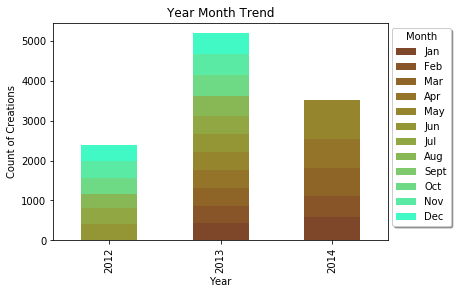

In [51]:
my_colors= ['#7F4729','#885528','#8F6427','#947429','#95852D','#949636','#90A743','#88B855','#7DC96B','#6FDA86','#5BEAA3','#41F9C4']

#plot day of week with stacked month break out
gp_yr_m.creation_time.unstack().plot(kind='bar', stacked=True, color= my_colors)
plt.title("Year Month Trend")
plt.ylabel("Count of Creations")
plt.xlabel('Year')
plt.legend(loc='upper center', bbox_to_anchor=(1.1,1),
          fancybox=True, shadow=True, ncol=1,title='Month')
sns.set() #set style and save
plt.savefig('gp_yr_month_trend_signup.png')

In [52]:
#group by day of week and month of year counts
moy_gp = df_users_signup.groupby(  ['yr',"moy", 'dow'] ).count()
#check
moy_gp.head()

creation_time  hod  moh  day  woy  week  doy
yr   moy dow                                              
2012 Jan Mon            NaN  NaN  NaN  NaN  NaN   NaN  NaN
         Tue            NaN  NaN  NaN  NaN  NaN   NaN  NaN
         Wed            NaN  NaN  NaN  NaN  NaN   NaN  NaN
         Thu            NaN  NaN  NaN  NaN  NaN   NaN  NaN
         Fri            NaN  NaN  NaN  NaN  NaN   NaN  NaN

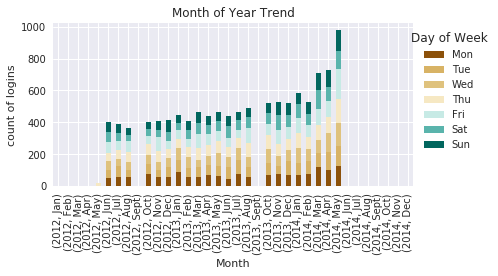

In [53]:
day_colors= ['#8c510a','#d8b365','#dfc27d','#f6e8c3','#c7eae5','#5ab4ac', '#01665e']

#plot day of week with stacked month break out
moy_gp.creation_time.unstack().plot(kind='bar', stacked=True, color=day_colors)
plt.title("Month of Year Trend")
plt.ylabel("count of logins")
plt.xlabel('Month')

plt.tight_layout()
#move legend outside 
plt.legend(loc='upper center', bbox_to_anchor=(1.1,1),
          fancybox=True, shadow=True, ncol=1, title='Day of Week')

sns.set()#set style
plt.savefig('mow_trend_signup.png')

Looks like we are missing some data. Sept seems to be an issue. May also shows a large increase in activity.

In [54]:
df_users

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
object_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,1.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0,0.0
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,NaN,0.0
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,1970-01-01 00:00:00,1,1,74,NaN,0.0
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,1970-01-01 00:00:00,0,0,302,NaN,0.0


next feature of interest

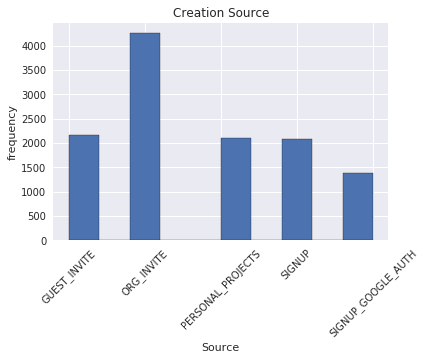

In [55]:
plt.hist(df_users.creation_source , edgecolor='k')
plt.xticks(rotation=45)
plt.xlabel('Source')
plt.ylabel('frequency')
plt.title('Creation Source')
plt.show()
plt.savefig('creation_source.png')

Next feature of interest last log in.

In [56]:
df_last_session= pd.DataFrame(df_users.last_session_creation_time)

In [57]:
make_columns(df_last_session,'last_session_creation_time' )
df_last_session.head()

,last_session_creation_time,yr,moy,dow,hod,moh,day,woy,week,doy
object_id,,,,,,,,,,
1,2014-04-22 03:53:30,2014,Apr,Tue,3,53,22,17,17,112
2,2014-03-31 03:45:04,2014,Mar,Mon,3,45,31,14,14,90
3,2013-03-19 23:14:52,2013,Mar,Tue,23,14,19,12,12,78
4,2013-05-22 08:09:28,2013,May,Wed,8,9,22,21,21,142
5,2013-01-22 10:14:20,2013,Jan,Tue,10,14,22,4,4,22


In [58]:
#change data to cat for plotting
#want days and month in order
#set label names
days = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] 
months = [ 'Jan', 'Feb', 'Mar', 'Apr','May',"Jun",'Jul','Aug','Sept','Oct','Nov','Dec'] #,'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']

#get days in order for 
cat_type = CategoricalDtype(categories=days, ordered=True) #convert to categories to sort
df_last_session['dow'] = df_last_session['dow'].astype(cat_type) #relabel values in column

#get months in order (same as above)
cat_type = CategoricalDtype(categories=months, ordered=True)
df_last_session['moy'] = df_last_session['moy'].astype(cat_type)




In [59]:
#group by day of week and month of year counts
gp_yr_m_last_login = df_last_session.groupby(  ["yr", 'moy'] ).count()
#check
gp_yr_m_last_login.head()

last_session_creation_time     dow     hod     moh     day     woy  \
yr   moy                                                                       
1970 Jan                      3177.0  3177.0  3177.0  3177.0  3177.0  3177.0   
     Feb                         NaN     NaN     NaN     NaN     NaN     NaN   
     Mar                         NaN     NaN     NaN     NaN     NaN     NaN   
     Apr                         NaN     NaN     NaN     NaN     NaN     NaN   
     May                         NaN     NaN     NaN     NaN     NaN     NaN   

            week     doy  
yr   moy                  
1970 Jan  3177.0  3177.0  
     Feb     NaN     NaN  
     Mar     NaN     NaN  
     Apr     NaN     NaN  
     May     NaN     NaN

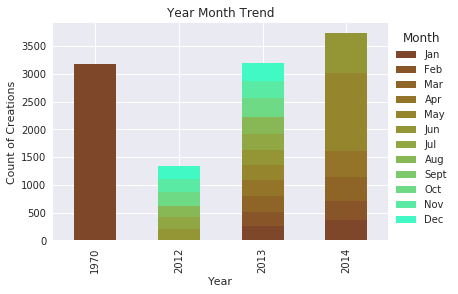

In [60]:
my_colors= ['#7F4729','#885528','#8F6427','#947429','#95852D','#949636','#90A743','#88B855','#7DC96B','#6FDA86','#5BEAA3','#41F9C4']

#plot day of week with stacked month break out
gp_yr_m_last_login.last_session_creation_time.unstack().plot(kind='bar', stacked=True, color= my_colors)
plt.title("Year Month Trend")
plt.ylabel("Count of Creations")
plt.xlabel('Year')
plt.legend(loc='upper center', bbox_to_anchor=(1.1,1),
          fancybox=True, shadow=True, ncol=1,title='Month')
sns.set() #set style and save
plt.savefig('gp_yr_month_trend_last_session.png')

note 1970 is the unavailable login information

In [61]:
#group by day of week and month of year counts
moy_gp_last_login = df_last_session.groupby(  ['yr',"moy", 'dow'] ).count()
#check
moy_gp_last_login.head()

last_session_creation_time     hod     moh     day     woy  \
yr   moy dow                                                               
1970 Jan Mon                         NaN     NaN     NaN     NaN     NaN   
         Tue                         NaN     NaN     NaN     NaN     NaN   
         Wed                         NaN     NaN     NaN     NaN     NaN   
         Thu                      3177.0  3177.0  3177.0  3177.0  3177.0   
         Fri                         NaN     NaN     NaN     NaN     NaN   

                week     doy  
yr   moy dow                  
1970 Jan Mon     NaN     NaN  
         Tue     NaN     NaN  
         Wed     NaN     NaN  
         Thu  3177.0  3177.0  
         Fri     NaN     NaN

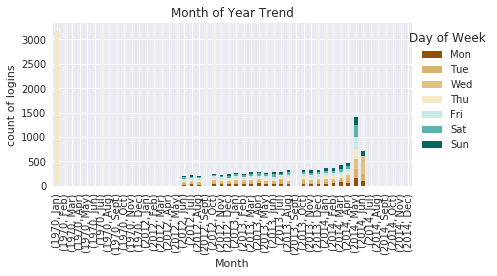

In [62]:
day_colors= ['#8c510a','#d8b365','#dfc27d','#f6e8c3','#c7eae5','#5ab4ac', '#01665e']

#plot day of week with stacked month break out
moy_gp_last_login.last_session_creation_time.unstack().plot(kind='bar', stacked=True, color=day_colors)
plt.title("Month of Year Trend")
plt.ylabel("count of logins")
plt.xlabel('Month')

plt.tight_layout()
#move legend outside 
plt.legend(loc='upper center', bbox_to_anchor=(1.1,1),
          fancybox=True, shadow=True, ncol=1, title='Day of Week')

sns.set()#set style


Removing the 1970 (unavailable login information)

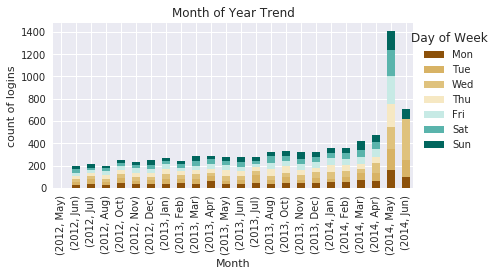

In [63]:
day_colors= ['#8c510a','#d8b365','#dfc27d','#f6e8c3','#c7eae5','#5ab4ac', '#01665e']

#plot day of week with stacked month break out
moy_gp_last_login[moy_gp_last_login['last_session_creation_time']<1970].last_session_creation_time.unstack().plot(kind='bar', stacked=True, color=day_colors)
plt.title("Month of Year Trend")
plt.ylabel("count of logins")
plt.xlabel('Month')

plt.tight_layout()
#move legend outside 
plt.legend(loc='upper center', bbox_to_anchor=(1.1,1),
          fancybox=True, shadow=True, ncol=1, title='Day of Week')

sns.set()#set style
plt.savefig('mow_trend_last_session.png')

(array([ 9006.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2994.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

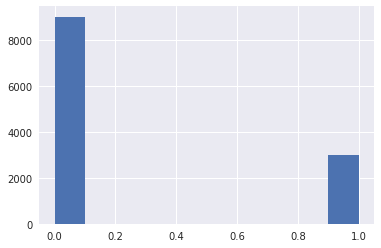

In [64]:
plt.hist(df_users.opted_in_to_mailing_list)

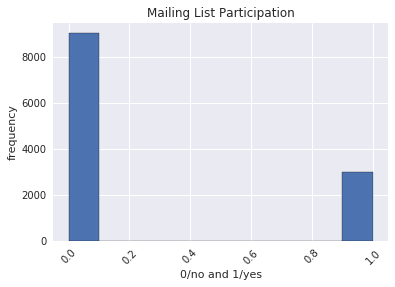

In [65]:
plt.hist(df_users.opted_in_to_mailing_list, edgecolor='k')
plt.xticks(rotation=45)
plt.xlabel('0/no and 1/yes')
plt.ylabel('frequency')
plt.title('Mailing List Participation')
plt.show()
plt.savefig('mailing_list.png')

In [66]:
df_users

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
object_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,1.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0
6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0,0.0
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,NaN,0.0
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,1970-01-01 00:00:00,1,1,74,NaN,0.0
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,1970-01-01 00:00:00,0,0,302,NaN,0.0


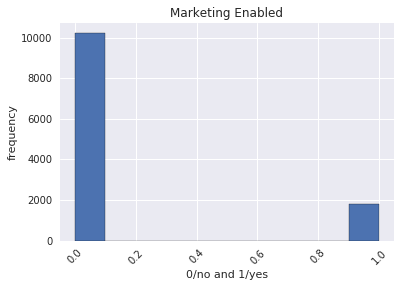

In [67]:
plt.hist(df_users.enabled_for_marketing_drip, edgecolor='k')
plt.xticks(rotation=45)
plt.xlabel('0/no and 1/yes')
plt.ylabel('frequency')
plt.title('Marketing Enabled')
plt.show()
plt.savefig('marketing.png')

Next Feature org_id : "the organization (group of users) they belong to"


In [68]:
df_users.org_id.nunique()

417

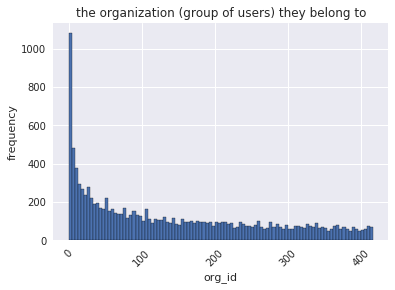

In [69]:
plt.hist(df_users.org_id, bins=100 , edgecolor='k')
plt.xticks(rotation=45)
plt.xlabel('org_id')
plt.ylabel('frequency')
plt.title('the organization (group of users) they belong to')
plt.show()
plt.savefig('org_id.png')

In [70]:
df_users.invited_by_user_id.nunique()

2564

In [71]:
#fill nan with zero
df_users.invited_by_user_id.fillna(0,inplace=True)

### There is no user_id zero. We will use this as a place holder for nan in reference to this column.

In [72]:
inviter= df_users[df_users.invited_by_user_id != 0]

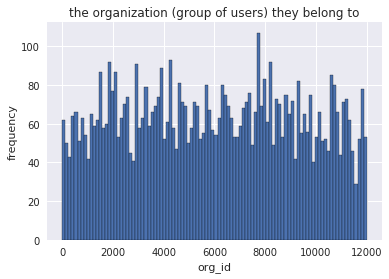

In [73]:
plt.hist(inviter.invited_by_user_id,bins=100, edgecolor='k')
#plt.xticks(rotation=45)
plt.xlabel('org_id')
plt.ylabel('frequency')
plt.title('the organization (group of users) they belong to')
plt.show()
plt.savefig('invited_by_user_id.png')

In [74]:
df_users.invited_by_user_id.describe()

count    12000.000000
mean      3188.691333
std       3869.027693
min          0.000000
25%          0.000000
50%        875.000000
75%       6317.000000
max      11999.000000
Name: invited_by_user_id, dtype: float64

# Preprocessing for modeling

In [75]:
#one hot encode for modeling 
df_model = df_users.join(pd.get_dummies(df_users.creation_source))
df_model.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
object_id,,,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0,1,0,0,0,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0,0,1,0,0,0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,1.0,0,1,0,0,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0,1,0,0,0,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0,1,0,0,0,0


In [76]:
#one hot encode for modeling 
df_model = df_model.join(pd.get_dummies(df_model.org_id,prefix='org_'))
df_model.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,...,org__407,org__408,org__409,org__410,org__411,org__412,org__413,org__414,org__415,org__416
object_id,,,,,,,,,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df_model = df_model.join(pd.get_dummies(df_users.invited_by_user_id,prefix="inviter_id"))
df_model.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,...,inviter_id_11966.0,inviter_id_11972.0,inviter_id_11973.0,inviter_id_11974.0,inviter_id_11978.0,inviter_id_11981.0,inviter_id_11986.0,inviter_id_11994.0,inviter_id_11997.0,inviter_id_11999.0
object_id,,,,,,,,,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
#create list of features for machine learning
features = list(df_model.columns)

In [79]:
features

['creation_time',
 'name',
 'email',
 'creation_source',
 'last_session_creation_time',
 'opted_in_to_mailing_list',
 'enabled_for_marketing_drip',
 'org_id',
 'invited_by_user_id',
 'adopted',
 'GUEST_INVITE',
 'ORG_INVITE',
 'PERSONAL_PROJECTS',
 'SIGNUP',
 'SIGNUP_GOOGLE_AUTH',
 'org__0',
 'org__1',
 'org__2',
 'org__3',
 'org__4',
 'org__5',
 'org__6',
 'org__7',
 'org__8',
 'org__9',
 'org__10',
 'org__11',
 'org__12',
 'org__13',
 'org__14',
 'org__15',
 'org__16',
 'org__17',
 'org__18',
 'org__19',
 'org__20',
 'org__21',
 'org__22',
 'org__23',
 'org__24',
 'org__25',
 'org__26',
 'org__27',
 'org__28',
 'org__29',
 'org__30',
 'org__31',
 'org__32',
 'org__33',
 'org__34',
 'org__35',
 'org__36',
 'org__37',
 'org__38',
 'org__39',
 'org__40',
 'org__41',
 'org__42',
 'org__43',
 'org__44',
 'org__45',
 'org__46',
 'org__47',
 'org__48',
 'org__49',
 'org__50',
 'org__51',
 'org__52',
 'org__53',
 'org__54',
 'org__55',
 'org__56',
 'org__57',
 'org__58',
 'org__59',
 'org__6

In [80]:
#drop columns not for feature training
features.remove('creation_time')
features.remove('name')
features.remove('email')
features.remove('creation_source')
features.remove('last_session_creation_time')
features.remove('org_id')
features.remove('invited_by_user_id')
features.remove('adopted')

In [81]:
#separate features from training data
x_df = df_model[features]
x_df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,org__0,org__1,org__2,...,inviter_id_11966.0,inviter_id_11972.0,inviter_id_11973.0,inviter_id_11974.0,inviter_id_11978.0,inviter_id_11981.0,inviter_id_11986.0,inviter_id_11994.0,inviter_id_11997.0,inviter_id_11999.0
object_id,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
#capture labels
y_df=df_model['adopted']
y_df.head(3)

object_id
1    0.0
2    1.0
3    1.0
Name: adopted, dtype: float64

In [83]:
# split into training and test sets
x_train, x_test, y_train, y_test= train_test_split(x_df,y_df, test_size=.3, random_state=42)




In [84]:
#see if the training data has the proper balance of riders 
print ('% adopted users in training set {:2f}'.format(float(y_train.sum())/y_train.size))
print ('% adopted users in test set {:2f}'.format(float(y_test.sum())/y_test.size))

% adopted users in training set 0.252738
% adopted users in test set 0.243333


In [85]:
#create classifier from best parameters out of grid search
clf_rf=RandomForestClassifier()
#fit classifier to validation set
clf_rf.fit(x_train , y_train)

#get the prediction set for the validation 
preds_train_rf = clf_rf.predict(x_train)

#make some predictions
preds_rf = clf_rf.predict(x_test)


#print the accuracy score for the training data
training_accuracy = clf_rf.score( x_train , y_train )
print("Accuracy on training data: {:0.2f}".format( training_accuracy ) )

#print the accuracy score for the test data
test_accuracy = clf_rf.score(x_test , y_test)
print("Accuracy on test data: {:0.2f}".format( test_accuracy ) )

#print training f1 score
fscore_train = metrics.f1_score( y_train , preds_train_rf )
print("F1 Score on train data: {:0.4f}".format(fscore_train))

#print testing f1 score
fscore = metrics.f1_score( y_test , preds_rf , pos_label=1 )
print("F1 Score on validation (train-test set) data: {:0.4f}\n".format( fscore ) )


print ( classification_report ( y_test , preds_rf ))

Accuracy on training data: 0.87
Accuracy on test data: 0.70
F1 Score on train data: 0.6934
F1 Score on validation (train-test set) data: 0.1689

             precision    recall  f1-score   support

        0.0       0.76      0.89      0.82      2724
        1.0       0.27      0.12      0.17       876

avg / total       0.64      0.70      0.66      3600



In [86]:
#know lets tune the parameters for the random forest

#set parametets to tune in Random Grid Search (# trees in forest and # of features per tree)
parameters={'n_estimators':range(1,40),'max_features':['auto',1,2,3,4,5]  }

#create an instance of the random forest classifier
rf=RandomForestClassifier(class_weight='balanced',random_state=42)

#randomize grid search for parameters with cross validation and refit on entire training set
#spread across two jobs and seed a random state
rs = RandomizedSearchCV(rf, param_distributions=parameters,cv=5,refit=True,n_jobs=2,random_state=42,scoring='f1')

#fit grid search on random forest over grid
%time rs.fit( x_train ,  y_train )

CPU times: user 7.83 s, sys: 130 ms, total: 7.96 s
Wall time: 2min 4s


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=2,
          param_distributions={'n_estimators': range(1, 40), 'max_features': ['auto', 1, 2, 3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [87]:
#save best parameters to use on test set
best_n = rs.best_params_['n_estimators'] 
best_features=rs.best_params_['max_features'] 

#print best parameter results
print("the best number of trees is {} with a maximum number of features of {}".format(best_n,best_features))
print("the best f1 score with these is {}".format(rs.best_score_))

the best number of trees is 16 with a maximum number of features of 2
the best f1 score with these is 0.22559086973142353


In [88]:
rs.best_params_

{'n_estimators': 16, 'max_features': 2}

In [89]:
#create classifier from best parameters out of grid search
clf_rf=rs.best_estimator_
#fit classifier to validation set
clf_rf.fit(x_train,y_train)

#get the prediction set for the validation 
preds_train_rf = clf_rf.predict(x_train)

#make some predictions
preds_rf = clf_rf.predict(x_test)


#print the accuracy score for the training data
training_accuracy = clf_rf.score( x_train , y_train )
print("Accuracy on training data: {:0.2f}".format( training_accuracy ) )

#print the accuracy score for the test data
test_accuracy = clf_rf.score(x_test , y_test)
print("Accuracy on test data: {:0.2f}".format( test_accuracy ) )

#print training f1 score
fscore_train = metrics.f1_score( y_train , preds_train_rf )
print("F1 Score on train data: {:0.4f}".format(fscore_train))

#print testing f1 score
fscore_train_rf = metrics.f1_score( y_test , preds_rf , pos_label=1 )
print("F1 Score on validation (train-test set) data: {:0.4f}".format( fscore_train_rf ) )


print ( classification_report ( y_test , preds_rf ))

Accuracy on training data: 0.87
Accuracy on test data: 0.66
F1 Score on train data: 0.7557
F1 Score on validation (train-test set) data: 0.2251
             precision    recall  f1-score   support

        0.0       0.76      0.80      0.78      2724
        1.0       0.25      0.21      0.23       876

avg / total       0.63      0.66      0.64      3600



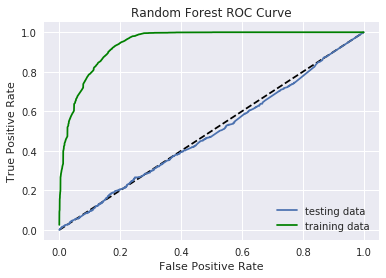

In [90]:
#predict the probabilities for each observation in training set
pred_train_prob_rf = clf_rf.predict_proba(x_train)[:,1]

#predict the probabilities for each observation in test set
pred_prob_rf = clf_rf.predict_proba(x_test)[:,1]

#get false positive rate, true positive rate, and thresholds for training data
xfpr_rf , xtpr_rf , xthres_rf = roc_curve(y_train , pred_train_prob_rf )

#get false positive rate, true positive rate, and thresholds for test data
fpr_rf , tpr_rf , thres_rf = roc_curve( y_test , pred_prob_rf )

#plot base line at .5 probability
plt.plot([0,1],[0,1],'k--')
#plot model train and test
plt.plot( fpr_rf , tpr_rf ,label='testing data')
plt.plot( xfpr_rf , xtpr_rf , 'g-',label='training data')
#add labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Random Forest ROC Curve')
plt.legend(loc=4)
plt.show()

In [91]:
#know lets tune the parameters for the random forest

#set parametets to tune in Random Grid Search (# trees in forest and # of features per tree)
parameters={'max_depth': range(1,14) , 'min_samples_leaf':[5,10,20,30,40,50,100] }

#create an instance of the random forest classifier
rf=RandomForestClassifier(class_weight='balanced', random_state=42)

#randomize grid search for parameters with cross validation and refit on entire training set
#spread across two jobs and seed a random state
rs = RandomizedSearchCV(rf, param_distributions=parameters,cv=5,refit=True,n_jobs=2,random_state=42,scoring='f1')

#fit grid search on random forest over grid
%time rs.fit( x_train ,  y_train )

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-sco

CPU times: user 2.14 s, sys: 190 ms, total: 2.33 s
Wall time: 9.76 s


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=2,
          param_distributions={'max_depth': range(1, 14), 'min_samples_leaf': [5, 10, 20, 30, 40, 50, 100]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [92]:
rs.best_params_

{'min_samples_leaf': 20, 'max_depth': 7}

In [93]:
#know lets tune the parameters for the random forest

#set parametets to tune in Random Grid Search (# trees in forest and # of features per tree)
parameters={'n_estimators':range(1,40),'max_features':['auto',1,2,3,4,5], 'max_depth': [ rs.best_params_['max_depth'] ] , 'min_samples_leaf' : [rs.best_params_['min_samples_leaf'] ] }

#create an instance of the random forest classifier
rf=RandomForestClassifier(class_weight='balanced', random_state=42)

#randomize grid search for parameters with cross validation and refit on entire training set
#spread across two jobs and seed a random state
rs = RandomizedSearchCV(rf, param_distributions=parameters,cv=5,refit=True,n_jobs=2,random_state=42,scoring='f1')

#fit grid search on random forest over grid
%time rs.fit( x_train ,  y_train )


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-sco

CPU times: user 2.16 s, sys: 120 ms, total: 2.28 s
Wall time: 9.78 s


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=2,
          param_distributions={'n_estimators': range(1, 40), 'max_features': ['auto', 1, 2, 3, 4, 5], 'max_depth': [7], 'min_samples_leaf': [20]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [94]:
#create classifier from best parameters out of grid search
clf_rf=rs.best_estimator_
#fit classifier to validation set
clf_rf.fit(x_train,y_train)

#get the prediction set for the validation 
preds_train_rf = clf_rf.predict(x_train)

#make some predictions
preds_rf = clf_rf.predict(x_test)


#print the accuracy score for the training data
training_accuracy = clf_rf.score( x_train , y_train )
print("Accuracy on training data: {:0.2f}".format( training_accuracy ) )

#print the accuracy score for the test data
test_accuracy = clf_rf.score(x_test , y_test)
print("Accuracy on test data: {:0.2f}".format( test_accuracy ) )

#print training f1 score
fscore_train = metrics.f1_score( y_train , preds_train_rf )
print("F1 Score on train data: {:0.4f}".format(fscore_train))

#print testing f1 score
fscore_train_rf = metrics.f1_score( y_test , preds_rf , pos_label=1 )
print("F1 Score on validation (train-test set) data: {:0.4f}".format( fscore_train_rf ) )


print ( classification_report ( y_test , preds_rf ))


Accuracy on training data: 0.55
Accuracy on test data: 0.54
F1 Score on train data: 0.3678
F1 Score on validation (train-test set) data: 0.3455
             precision    recall  f1-score   support

        0.0       0.77      0.55      0.65      2724
        1.0       0.26      0.50      0.35       876

avg / total       0.65      0.54      0.57      3600



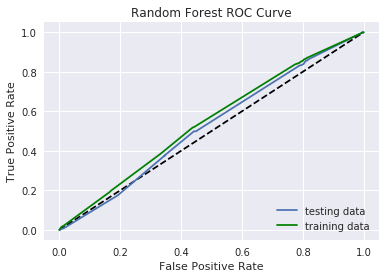

In [95]:
#predict the probabilities for each observation in training set
pred_train_prob_rf = clf_rf.predict_proba(x_train)[:,1]

#predict the probabilities for each observation in test set
pred_prob_rf = clf_rf.predict_proba(x_test)[:,1]

#get false positive rate, true positive rate, and thresholds for training data
xfpr_rf , xtpr_rf , xthres_rf = roc_curve(y_train , pred_train_prob_rf )

#get false positive rate, true positive rate, and thresholds for test data
fpr_rf , tpr_rf , thres_rf = roc_curve( y_test , pred_prob_rf )

#plot base line at .5 probability
plt.plot([0,1],[0,1],'k--')
#plot model train and test
plt.plot( fpr_rf , tpr_rf ,label='testing data')
plt.plot( xfpr_rf , xtpr_rf , 'g-',label='training data')
#add labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Random Forest ROC Curve')
plt.legend(loc=4)
plt.show()

In [96]:
rf_test_auc=roc_auc_score(y_test , pred_prob_rf)
print("The Area Under the Curve foe the Randam Forest is {:.2f}".format(rf_test_auc))

The Area Under the Curve foe the Randam Forest is 0.52


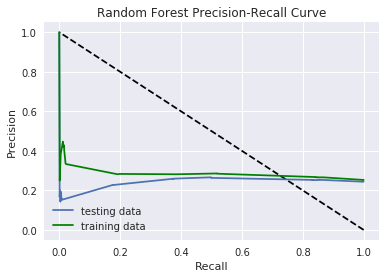

In [97]:
xprec_score_rf , xrecall_score_rf ,xthresholds_rf = precision_recall_curve( y_train , pred_train_prob_rf )

prec_score_rf , recall_score_rf ,thresholds_rf = precision_recall_curve( y_test , pred_prob_rf)

plt.plot([1,0],[0,1],'k--')
plt.plot( recall_score_rf , prec_score_rf ,label='testing data')
plt.plot( xrecall_score_rf , xprec_score_rf ,'g-',label='training data')

#plt.plot(xfpr,xtpr, 'g-',label='training data')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('Random Forest Precision-Recall Curve')
plt.legend(loc=3)
plt.show()

In [ ]:
#Capture model feature importance 
importances=clf_rf.feature_importances_

#pair feature score with feature name
sorted_features = sorted (zip (features,importances), key =lambda x:x[1]* -1 )

#get length of x axis 
x_values = list(range(len(sorted_features)))
#plot feature importance 
for i in range(len(sorted_features)):
    plt.bar( x_values, [pt[1] for pt in sorted_features], color='skyblue')
    plt.xticks(x_values, [pt[0] for pt in sorted_features],label = 'id %s'%i, rotation='vertical', fontsize=10)
    
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Random Forest Variable Importances');

#save figure
plt.savefig('feature_importance.png')
#show figure in notebook
plt.show()

In [ ]:
#get length of x axis 
x_values = list(range(len(sorted_features[:10])))
#plot feature importance 
for i in range(len(sorted_features[:10])):
    plt.bar( x_values, [pt[1] for pt in sorted_features[:10]], color='skyblue')
    plt.xticks(x_values, [pt[0] for pt in sorted_features[:10]],label = 'id %s'%i, rotation='vertical', fontsize=10)
    
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Random Forest Top Ten Variable Importances');

#save figure
plt.savefig('feature_importance_10.png')
#show figure in notebook
plt.show()

In [ ]:
clf_rf.feature_importances_

In [ ]:
imp = (zip (features,importances))
for i in imp:
    #keep only features that have a positive value
    if i[1] > .001:
        top.append(i)

In [ ]:

#get length of x axis 
x_values = list(range(len(sorted(top)[:10])))
#plot feature importance 
for i in range(len(sorted(top)[:10])):
    plt.bar( x_values, [pt[1] for pt in sorted(top)[:10]], color='skyblue')
    plt.xticks(x_values, [pt[0] for pt in sorted(top)[:10]],label = 'id %s'%i, rotation='vertical', fontsize=10)
    
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Random Forest Top Ten Variable Importances');

#save figure
plt.savefig('feature_importance_10.png')
#show figure in notebook
plt.show()

In [ ]:
2+2

# Random Forest Results

We see that the model is not very strong with an AUC score of just .52. We need to consider looking for better features. 

In [ ]:
sorted (zip (features,importances), key =lambda x:x[1]*-1)

In [ ]:
Capture model feature importance 
importances=clf_rf.feature_importances_
#list to catch the top features
top=[]
#pair feature score with feature name
sorted_features = sorted (zip (features,importances), key =lambda x:x[1]* -1 )
for i in imp:
    #keep only features that have a positive value
    if i[1] > .001:
        top.append(i)
#get length of x axis 
x_values = list(range(len(top)))
#plot feature importance 
for i in range(len(top)):
    plt.bar( x_values, [pt[1] for pt in top], color='skyblue')
    plt.xticks(x_values, [pt[0] for pt in top],label = 'id %s'%i, rotation='vertical', fontsize=10)
    
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Random Forest Variable Importances');

#save figure
plt.savefig('feature_importance.png')
#show figure in notebook
plt.show()